In [1]:
import itertools
import numpy as np 

In [2]:
from setupPOMDP import *
from visualizeEnvironment import *

# Environments

Three possible environments: C, Reverse C, and O shaped (letter corresponds to where the barrier is)  

environmentC, environmentReverseC, and environmentO are the environmental dynamics for each environment.

In [3]:
# Actions correspond to E, N, W, S, Stay respectively
allActions = [(1,0), (0,1), (-1,0), (0,-1), (0,0)]

#all location states in grid
gridWidth = 10
gridHeight = 5
gridSet = set(itertools.product(range(gridWidth), range(gridHeight)))

#set of states to remove from each environment
barriersC = {(2,2), (3,2), (4,2), (5,2), (6,2), (7,2), (8,2), (9,2)}
barriersReverseC = {(0,2), (1,2), (2,2), (3,2), (4,2), (5,2), (6,2), (7,2)}
barriersO = {(2,2), (3,2), (4,2), (5,2), (6,2), (7,2)}

#final environment state sets
stateSetC = list(gridSet.difference(barriersC))
stateSetReverseC = list(gridSet.difference(barriersReverseC))
stateSetO = list(gridSet.difference(barriersO))

#goal locations
goal1 = (0,0)
goal2 = (9,4)

#probability of ineffective action
epsilon = .1

In [4]:
getTransition = SetupTransition(epsilon)

# possible environment transitions
environmentC = getTransition(stateSetC, allActions)
environmentReverseC = getTransition(stateSetReverseC, allActions)
environmentO = getTransition(stateSetO, allActions)

In [5]:
"""
Probabilistically draw the next location state given the dynamics of the transition function
Input: transition dictionary, current state tuple, action tuple
Output: next location state tuple
"""
def drawNextState(transitionFunction, state, action):
    nextStates = list(transitionFunction[state][action].keys())
    probabilities = list(transitionFunction[state][action].values())
    nextState = nextStates[np.random.choice(len(nextStates), p=probabilities)]
    return(nextState)

In [6]:
# Example:
drawNextState(environmentC, (0,0), (1,0))

(1, 0)

## Environment C Example

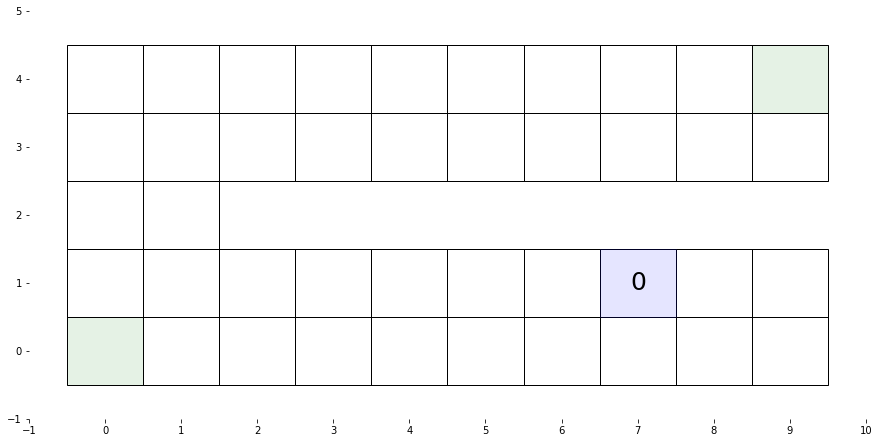

In [7]:
visualizeEnvironment(gridWidth = gridWidth, gridHeight = gridHeight, states = stateSetC, \
                     goalStates = [(0,0, " "), (9,4, " ")], trajectory = [(7,1)])

# Preferences

lists all possible worlds as well as all possible preference rankings among K, L, and M

In [8]:
allWorlds = [(c1, c2) for c1, c2 in itertools.permutations("KLM", 2)]
possibleWorldsInLocation = [{goal1: comb1, goal2: comb2} for comb1, comb2 in itertools.permutations("KLM", 2)]
possiblePreferenceRankings = [rank for rank in itertools.permutations("KLM",3)]

In [9]:
print(allWorlds, "\n")
print(possibleWorldsInLocation, "\n")
print(possiblePreferenceRankings, "\n")

[('K', 'L'), ('K', 'M'), ('L', 'K'), ('L', 'M'), ('M', 'K'), ('M', 'L')] 

[{(0, 0): 'K', (9, 4): 'L'}, {(0, 0): 'K', (9, 4): 'M'}, {(0, 0): 'L', (9, 4): 'K'}, {(0, 0): 'L', (9, 4): 'M'}, {(0, 0): 'M', (9, 4): 'K'}, {(0, 0): 'M', (9, 4): 'L'}] 

[('K', 'L', 'M'), ('K', 'M', 'L'), ('L', 'K', 'M'), ('L', 'M', 'K'), ('M', 'K', 'L'), ('M', 'L', 'K')] 



In [10]:
"""
Construct the input for a reward function.

Inputs: world is a dictionary where keys are the coordinates of goals and the values are the names of those goals
preference is a tuple indicating the relatve ranking of the worth of goals and 
preference rewards is a list of how much reward the rank of each goal should receive

outputs: a dictionary with goal locations as keys and the numerical reward associated with them as the values
"""
def constructPreferences(world, preference, preferenceRewards = [1000, 400, 100]):
    goalPreferences = {location : preferenceRewards[preference.index(truck)] for location, truck in world.items()}
    return(goalPreferences)

In [11]:
#Example
print(constructPreferences({(0,0):'L', (9,4):'K'}, ('M', 'L', 'K')))
print(constructPreferences(possibleWorldsInLocation[2], possiblePreferenceRankings[-1]))

{(0, 0): 400, (9, 4): 100}
{(0, 0): 400, (9, 4): 100}


# Rewards R(s, a, s')

Reward is defined for first, the environment, and second for the relative preferences of the agent. 
We create a reward for each possible world, given that preference relation.

In [12]:
getRewardC = SetupRewardTable(environmentC, allActions)

In [19]:
# example preference of M > K > L, a true world of K in position 0,0 and L in position 9,4
klWorld_mlkPreference = constructPreferences(possibleWorldsInLocation[2], possiblePreferenceRankings[-1])

# example reward function dictionaries for environment C dynamics, Preference M > K > L 
rewards_EnvC_PrefMLK = {tuple(world.values()) : getRewardC(constructPreferences(world, possiblePreferenceRankings[-1])) \
                        for world in possibleWorldsInLocation}

In [22]:
viewDictionaryStructure(rewards_EnvC_PrefMLK[('L', 'K')], levelsReward)

state: (7, 3)
	action: (1, 0)
		next state: (8, 3)
			reward: -1
		next state: (7, 3)
			reward: -1
	action: (0, 1)
		next state: (7, 4)
			reward: -1
		next state: (7, 3)
			reward: -1
	action: (-1, 0)
		next state: (6, 3)
			reward: -1
		next state: (7, 3)
			reward: -1
	action: (0, -1)
		next state: (7, 3)
			reward: -1
	action: (0, 0)
		next state: (7, 3)
			reward: -1
state: (1, 3)
	action: (1, 0)
		next state: (2, 3)
			reward: -1
		next state: (1, 3)
			reward: -1
	action: (0, 1)
		next state: (1, 4)
			reward: -1
		next state: (1, 3)
			reward: -1
	action: (-1, 0)
		next state: (0, 3)
			reward: -1
		next state: (1, 3)
			reward: -1
	action: (0, -1)
		next state: (1, 2)
			reward: -1
		next state: (1, 3)
			reward: -1
	action: (0, 0)
		next state: (1, 3)
			reward: -1
state: (9, 1)
	action: (1, 0)
		next state: (9, 1)
			reward: -1
	action: (0, 1)
		next state: (9, 1)
			reward: -1
	action: (-1, 0)
		next state: (8, 1)
			reward: -1
		next state: (9, 1)
			reward: -1
	action: (

# Belief Rewards Rho(b, s, a, s')

In [27]:
def getBeliefReward(worldBeliefs, worldRewardFunctions, state, action, nextState):
    beliefReward = sum([worldBeliefs[y]*worldRewardFunctions[y][state][action][nextState] for y in worldBeliefs])
    return(beliefReward)

In [24]:
# Example
impartial_b = {world: 1/6 for world in itertools.permutations("KLM", 2)}

In [30]:
getBeliefReward(impartial_b, rewards_EnvC_PrefMLK, (0,0), (0,0), (0,0))

499.9999999999999

# Belief Updating: Tau(b, a, b') 

$$ b_t(y) \propto p(o_t|x_t, y, env)b_{t-1}(y)$$

## constructing P(o|x, y)

In [ ]:
def createObservations(environment, trueWorldInLocation, stateSet):
    #{world : position state : possible goal: indicator of whether that possible goal is visible in that state/world combo}
    
